<a href="https://colab.research.google.com/github/muthonioprah/Maize-Crop-Disease-Detection-Using-Machine-Learning-and-Computer-Vision/blob/main/Transfer_Learning_Inception_V3_We_are_the_Millers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the libraries as shown below
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [18]:
# import the libraries as shown below
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow.keras as keras

In [3]:
#mounting the drive to access the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# re-size all the images to this
IMAGE_SIZE = [256, 256]

train_path = '/content/drive/Shareddrives/Group 1 /Splitted_Data/Train'
valid_path = '/content/drive/Shareddrives/Group 1 /Splitted_Data/Test'

In [5]:
# Import the inceptionv3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [6]:
# Making sure the existing weights ar not trained
for layer in inception.layers:
    layer.trainable = False
 

In [7]:
 #getting number of output classes
import os

folders = os.listdir('/content/drive/Shareddrives/Group 1 /Splitted_Data/Train')
folders

['Healthy Maize',
 'Maize Common Rust',
 'Maize Northern Leaf Blight',
 'Maize Head Smut',
 'Train Maize Streak',
 'Train Gray leaf spot']

In [8]:
# our layers - equal to the number of categories
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:

# tell the model what optimization method to use
model.compile(
  loss="categorical_crossentropy",
  optimizer=keras.optimizers.Adam(),
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescaling the train dataset
train_datagen = ImageDataGenerator(rescale = 1./255,)

test_datagen = ImageDataGenerator(rescale = 1./255)

#provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/Shareddrives/Group 1 /Splitted_Data/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 464 images belonging to 6 classes.


In [12]:
#rescalling the test dataset
test_set = test_datagen.flow_from_directory('/content/drive/Shareddrives/Group 1 /Splitted_Data/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 119 images belonging to 6 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
15/15 [==============================] - 335s 23s/step - loss: 14.8063 - accuracy: 0.3448 - val_loss: 7.5365 - val_accuracy: 0.4958
Epoch 2/10
15/15 [==============================] - 12s 828ms/step - loss: 3.7245 - accuracy: 0.6703 - val_loss: 5.1045 - val_accuracy: 0.4538
Epoch 3/10
15/15 [==============================] - 12s 791ms/step - loss: 1.1431 - accuracy: 0.8017 - val_loss: 4.7187 - val_accuracy: 0.5126
Epoch 4/10
15/15 [==============================] - 12s 802ms/step - loss: 0.6064 - accuracy: 0.8966 - val_loss: 4.0944 - val_accuracy: 0.5126
Epoch 5/10
15/15 [==============================] - 12s 814ms/step - loss: 0.3882 - accuracy: 0.9224 - val_loss: 4.4782 - val_accuracy: 0.4958
Epoch 6/10
15/15 [==============================] - 12s 814ms/step - loss: 0.4734 - accuracy: 0.9526 - val_loss: 4.7525 - val_accuracy: 0.4790
Epoch 7/10
15/15 [==============================] - 12s 810ms/step - loss: 0.3670 - accuracy: 0.9547 - val_loss: 3.9843 - val_accuracy: 0.5882

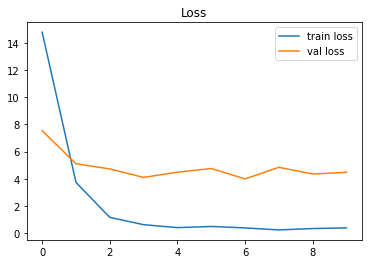

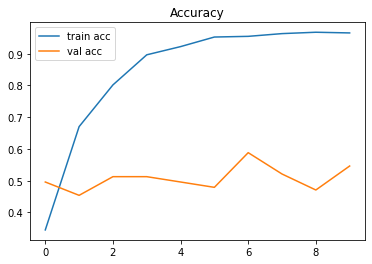

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()
plt.savefig('LossVal_loss')

print('\n')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [16]:
#Making predictions using the test set
y_pred = model.predict(test_set)
y_pred

array([[4.49512572e-06, 4.51281153e-07, 9.99914408e-01, 5.26378274e-09,
        8.07392571e-05, 2.12359991e-12],
       [3.79721854e-09, 1.64613361e-04, 5.82367314e-12, 9.93523836e-01,
        6.17869711e-03, 1.32788497e-04],
       [4.81949750e-30, 6.54213933e-13, 2.75028535e-27, 2.38490811e-05,
        1.97721223e-04, 9.99778450e-01],
       [7.11559145e-11, 3.36313315e-05, 5.20636700e-10, 7.30833621e-04,
        2.63321668e-01, 7.35913813e-01],
       [1.54920282e-20, 9.99998927e-01, 2.56751678e-14, 9.61734083e-15,
        1.65019365e-09, 1.04473952e-06],
       [4.68193539e-10, 7.99596091e-06, 9.98635471e-01, 5.90723539e-05,
        1.29638205e-03, 1.09837845e-06],
       [9.05354440e-01, 1.74393654e-06, 4.31148948e-07, 2.41429098e-05,
        5.47058407e-05, 9.45644751e-02],
       [2.52301646e-07, 1.79279429e-13, 1.12197266e-13, 9.99736726e-01,
        2.62905145e-04, 8.54088640e-08],
       [6.26041781e-23, 2.79751308e-02, 8.04912777e-14, 2.34271400e-04,
        7.26708323e-02, 

In [17]:
#put the predictions in an array of integers
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([2, 3, 5, 5, 1, 2, 0, 3, 5, 0, 1, 4, 4, 1, 5, 2, 5, 1, 4, 2, 2, 5,
       4, 1, 1, 1, 4, 5, 5, 1, 4, 2, 4, 2, 5, 5, 2, 2, 4, 4, 0, 1, 2, 4,
       1, 5, 4, 4, 5, 4, 5, 1, 0, 1, 2, 2, 0, 4, 0, 1, 4, 1, 4, 4, 4, 3,
       2, 5, 5, 0, 2, 2, 5, 0, 1, 4, 2, 3, 5, 2, 0, 4, 1, 3, 4, 0, 4, 1,
       5, 4, 1, 4, 4, 5, 2, 2, 4, 2, 4, 4, 1, 2, 4, 5, 0, 1, 4, 5, 5, 1,
       3, 2, 2, 1, 1, 4, 4, 4, 1])